## System impel

In [1]:
def initial_trend_old(series, slen):
    _sum = 0.0
    for i in range(slen):
        _sum += float(series[i+slen] - series[i]) / slen
    return _sum / slen

def initial_seasonal_components_old(series, slen):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(series)/slen)
    # compute season averages
    for j in range(n_seasons):
        season_averages.append(sum(series[slen*j:slen*j+slen])/float(slen))
    # compute initial values
    for i in range(slen):
        sum_of_vals_over_avg = 0.0
        for j in range(n_seasons):
            sum_of_vals_over_avg += series[slen*j+i]-season_averages[j]
        seasonals[i] = sum_of_vals_over_avg/n_seasons
    return seasonals

def triple_exponential_smoothing_old(series,n_preds, slen, alpha, beta, gamma):
    result = []
    seasonals = initial_seasonal_components_old(series, slen)
    for i in range(len(series)+n_preds):
        if i == 0: # initial values
            smooth = series[0]
            trend = initial_trend_old(series, slen)
            result.append(series[0])
            continue
        if i >= len(series): # we are forecasting
            m = i - len(series) + 1
            result.append((smooth + m*trend) + seasonals[i%slen])
        else:
            val = series[i]
            last_smooth, smooth = smooth, alpha*(val-seasonals[i%slen]) + (1-alpha)*(smooth+trend)
            trend = beta * (smooth-last_smooth) + (1-beta)*trend
            seasonals[i%slen] = gamma*(val-smooth) + (1-gamma)*seasonals[i%slen]
            result.append(smooth+trend+seasonals[i%slen])
    return result

## 12 hours of working hours values

In [5]:
working_hours = [30,21,29,31,40,48,53,47,37,39,31,29,17,9,20,24,27,35,41,38,
          27,31,27,26,21,13,21,18,33,35,40,36,22,24,21,20,17,14,17,19,
          26,29,40,31,20,24,18,26]

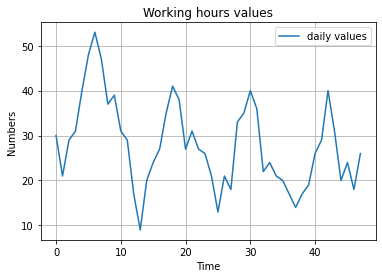

In [6]:
import matplotlib.pyplot as plt

# plotting the Series
plt.plot(working_hours, label = "daily values")

#plt.plot(smoothen, label = "my selection")
# giving a title to the graph
plt.title('Working hours values')
# naming the x axis
plt.xlabel('Time')
# naming the y axis
plt.ylabel('Numbers')

plt.grid(True)
# show a legend on the plot
plt.legend()

# function to show the plot
plt.show()

## Forecasting the start of the day with complete two weeks

In [7]:

day_value = working_hours+[0]*4*12
workdays = day_value * 5
week = workdays + [0]*4*48
two_weeks = week*2

to_forecast= 12*4
seasonlity = 7*4*24


In [8]:
def score_remove_zeros(true,pred):
    return (true[true>0] - pred[true>0])/true[true>0]

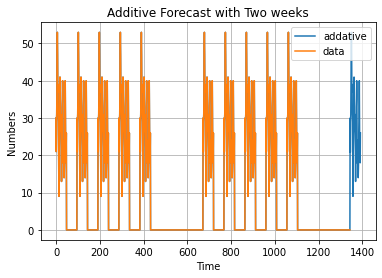

In [21]:
import matplotlib.pyplot as plt

# plotting the Series
two_weeks_addative_result = triple_exponential_smoothing_old(two_weeks,to_forecast,seasonlity, 0.99, 0.1, 1.0)

plt.plot(range(len(two_weeks)+to_forecast),two_weeks+two_weeks_addative_result[-to_forecast:], label = "addative")
plt.plot(range(len(two_weeks)),two_weeks, label = "data")

#plt.plot(smoothen, label = "my selection")
# giving a title to the graph
plt.title('Additive Forecast with Two weeks')
# naming the x axis
plt.xlabel('Time')
# naming the y axis
plt.ylabel('Numbers')

plt.grid(True)
# show a legend on the plot
plt.legend()

# function to show the plot
plt.show()

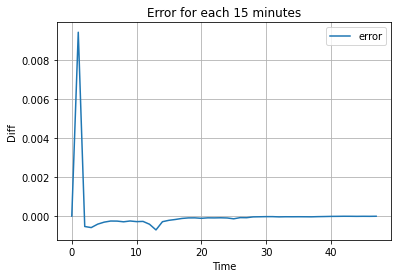

In [22]:
import matplotlib.pyplot as plt
import numpy as np

error  = score_remove_zeros(np.array(working_hours[:to_forecast]),np.array(two_weeks_addative_result[-to_forecast:]))
# plotting the Series
plt.plot(error, label = "error")

#plt.plot(smoothen, label = "my selection")
# giving a title to the graph
plt.title('Error for each 15 minutes')
# naming the x axis
plt.xlabel('Time')
# naming the y axis
plt.ylabel('Diff')

plt.grid(True)
# show a legend on the plot
plt.legend()

# function to show the plot
plt.show()

# Assume couple of hours has pass

In [11]:
hours = 4
working_hours_to_add = 4*hours
two_weeks_with_some_hours = two_weeks + day_value[:working_hours_to_add]

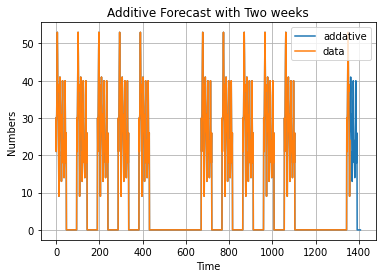

In [23]:
import matplotlib.pyplot as plt

# plotting the Series
two_weeks_with_some_hours_addative_result = triple_exponential_smoothing_old(two_weeks_with_some_hours,to_forecast,seasonlity, 0.99, 0.1, 1.0)

plt.plot(range(len(two_weeks_with_some_hours)+to_forecast),two_weeks_with_some_hours + two_weeks_with_some_hours_addative_result[-to_forecast:], label = "addative")
plt.plot(range(len(two_weeks_with_some_hours)),two_weeks_with_some_hours, label = "data")

#plt.plot(smoothen, label = "my selection")
# giving a title to the graph
plt.title('Additive Forecast with Two weeks')
# naming the x axis
plt.xlabel('Time')
# naming the y axis
plt.ylabel('Numbers')

plt.grid(True)
# show a legend on the plot
plt.legend()

# function to show the plot
plt.show()

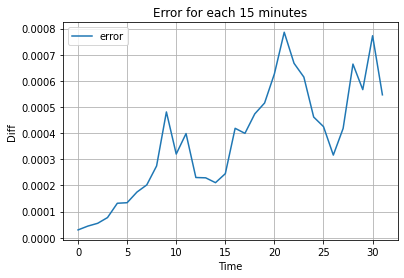

In [24]:
import matplotlib.pyplot as plt
import numpy as np

error  = score_remove_zeros(np.array(day_value[working_hours_to_add:working_hours_to_add+to_forecast]),np.array(two_weeks_with_some_hours_addative_result[-to_forecast:]))
# plotting the Series
plt.plot(error, label = "error")

#plt.plot(smoothen, label = "my selection")
# giving a title to the graph
plt.title('Error for each 15 minutes')
# naming the x axis
plt.xlabel('Time')
# naming the y axis
plt.ylabel('Diff')

plt.grid(True)
# show a legend on the plot
plt.legend()

# function to show the plot
plt.show()

# Decreasing the error by changing betta to 0.2

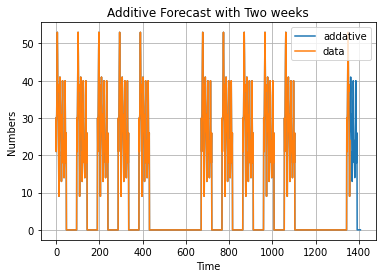

In [29]:
import matplotlib.pyplot as plt

# plotting the Series
two_weeks_with_some_hours_addative_result = triple_exponential_smoothing_old(two_weeks_with_some_hours,to_forecast,seasonlity, 0.99, 0.2, 1.0)

plt.plot(range(len(two_weeks_with_some_hours)+to_forecast),two_weeks_with_some_hours + two_weeks_with_some_hours_addative_result[-to_forecast:], label = "addative")
plt.plot(range(len(two_weeks_with_some_hours)),two_weeks_with_some_hours, label = "data")

#plt.plot(smoothen, label = "my selection")
# giving a title to the graph
plt.title('Additive Forecast with Two weeks')
# naming the x axis
plt.xlabel('Time')
# naming the y axis
plt.ylabel('Numbers')

plt.grid(True)
# show a legend on the plot
plt.legend()

# function to show the plot
plt.show()

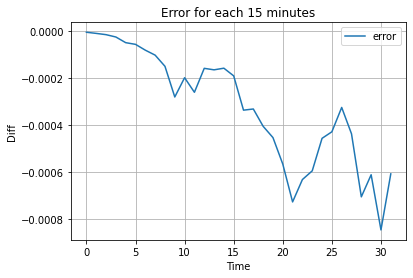

In [30]:
import matplotlib.pyplot as plt
import numpy as np

error  = score_remove_zeros(np.array(day_value[working_hours_to_add:working_hours_to_add+to_forecast]),np.array(two_weeks_with_some_hours_addative_result[-to_forecast:]))
# plotting the Series
plt.plot(error, label = "error")

#plt.plot(smoothen, label = "my selection")
# giving a title to the graph
plt.title('Error for each 15 minutes')
# naming the x axis
plt.xlabel('Time')
# naming the y axis
plt.ylabel('Diff')

plt.grid(True)
# show a legend on the plot
plt.legend()

# function to show the plot
plt.show()

In [33]:
mean_errors = list()
median_errors = list()
steps = list(range(len(day_value)))
for step in steps:
    two_weeks_with_var_hours = two_weeks + day_value[:step]
    
    two_weeks_with_var_hours_addative_result = triple_exponential_smoothing_old(two_weeks_with_var_hours,to_forecast,seasonlity, 0.9, 0.1, 1.0)
    prec_error  = score_remove_zeros(np.array(two_weeks[step:step+to_forecast]),np.array(two_weeks_with_var_hours_addative_result[-to_forecast:]))
    
    mean_errors.append(prec_error.mean())
    median_errors.append(np.median(prec_error))

<ipython-input-33-0823efc711b6>:10: RuntimeWarning: Mean of empty slice.
  mean_errors.append(prec_error.mean())
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


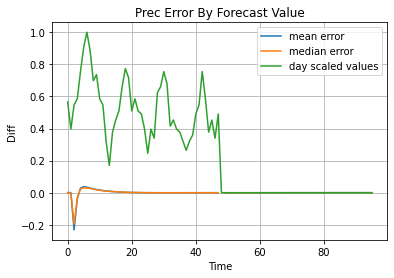

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# plotting the Series
plt.plot(steps,mean_errors, label = "mean error")
plt.plot(steps,median_errors, label = "median error")
plt.plot(steps,np.divide(day_value,max(day_value)),label="day scaled values")

#plt.plot(smoothen, label = "my selection")
# giving a title to the graph
plt.title('Prec Error By Forecast Value')
# naming the x axis
plt.xlabel('Time')
# naming the y axis
plt.ylabel('Diff')

plt.grid(True)
# show a legend on the plot
plt.legend()

# function to show the plot
plt.show()